In [56]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib widget

In [150]:
def imagem_para_tons_de_cinza(caminho_da_imagem):
    # Abrir a imagem
    imagem = Image.open(caminho_da_imagem)
    
    # Converter para tons de cinza
    imagem_em_tons_de_cinza = imagem.convert('L')
    
    # Retornar a matriz de pixels em tons de cinza
    return imagem_em_tons_de_cinza


def dividir_em_blocos(imagem, t1, t2):
    largura, altura = imagem.size
    blocos = []
    
    # Iterar sobre a imagem em blocos de tamanho t1 x t2
    for y in range(0, altura, t2):
        for x in range(0, largura, t1):
            # Recortar o bloco da imagem
            bloco = imagem.crop((x, y, x + t1, y + t2))
            # Adicionar o bloco à lista de blocos
            blocos.append(bloco)
    
    return blocos

def corte(imagem,valor,tipo):
    largura, altura = imagem.size
    
    # Converter a imagem para tons de cinza, se necessário
    if imagem.mode != 'L':
        imagem = imagem.convert('L')
    
    # Criar uma cópia da imagem
    imagem_filtrada = imagem.copy()
    
    # Obtém a matriz de tons de cinza da imagem filtrada
    matriz_tons_de_cinza = list(imagem_filtrada.getdata())
    
    # Aplicar o filtro na matriz de tons de cinza
    if tipo=='M':
        matriz_filtrada = [255 if pixel < valor else 0 for pixel in matriz_tons_de_cinza]
    if tipo=='m':
        matriz_filtrada = [255 if pixel > valor else 0 for pixel in matriz_tons_de_cinza]
    
    # Atualizar a imagem filtrada com a nova matriz de tons de cinza
    imagem_filtrada.putdata(matriz_filtrada)
    
    return imagem_filtrada


def matriz_para_imagem(matriz_tons_de_cinza):
    largura = len(matriz_tons_de_cinza[0])
    altura = len(matriz_tons_de_cinza)
    
    # Criar uma nova imagem em tons de cinza
    imagem = Image.new('L', (largura, altura))
    
    # Preencher a imagem com os valores da matriz
    for y in range(altura):
        for x in range(largura):
            valor_pixel = 100*matriz_tons_de_cinza[y][x]
            imagem.putpixel((x, y), valor_pixel)
    
    return imagem
    

def tornar_quadrada(imagem):
    largura, altura = imagem.size
    
    # Determinar o tamanho máximo entre a largura e a altura
    tamanho_maximo = max(largura, altura)
    
    # Criar uma nova imagem quadrada
    imagem_quadrada = Image.new('L', (tamanho_maximo, tamanho_maximo), color=0)
    
    # Calcular as coordenadas de início para colar a imagem original
    inicio_x = (tamanho_maximo - largura) // 2
    inicio_y = (tamanho_maximo - altura) // 2
    
    # Colar a imagem original no centro da nova imagem quadrada
    imagem_quadrada.paste(imagem, (inicio_x, inicio_y))
    
    return imagem_quadrada

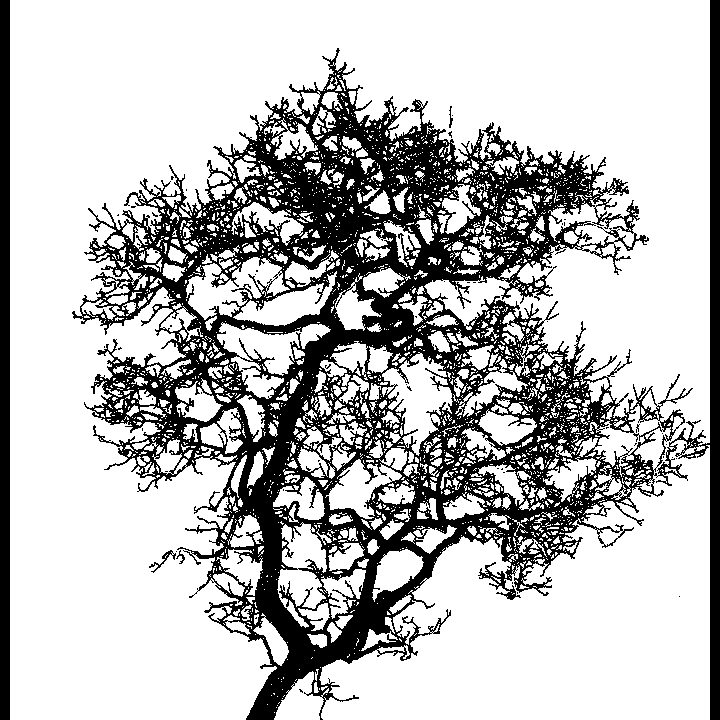

In [158]:

caminho_da_imagem = './imagens/image2.png'
matriz_tons_de_cinza = imagem_para_tons_de_cinza(caminho_da_imagem)
imagem_processada = tornar_quadrada(corte(matriz_tons_de_cinza,10,'M'))
imagem_processada




In [159]:
largura,altura = imagem_processada.size
dados = {}
for i in list(range(largura,2,-2)):
    prop = i/largura
    prop_inv = 1/prop
    blocos = dividir_em_blocos(imagem_processada, i, i)
    contagem = 0
    for i, bloco in enumerate(blocos):
        el_nn = np.sum(np.array(bloco)<1)
        if el_nn>0:
            contagem=contagem+1
    dados[contagem]=prop_inv

tam_lado = list(dados.values())
num_caixas = list(dados.keys())

/var/folders/z6/n6t25pkx2nl6t75_c5d0rm0h0000gn/T/ipykernel_1736/3673846112.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig,ax = plt.subplots()


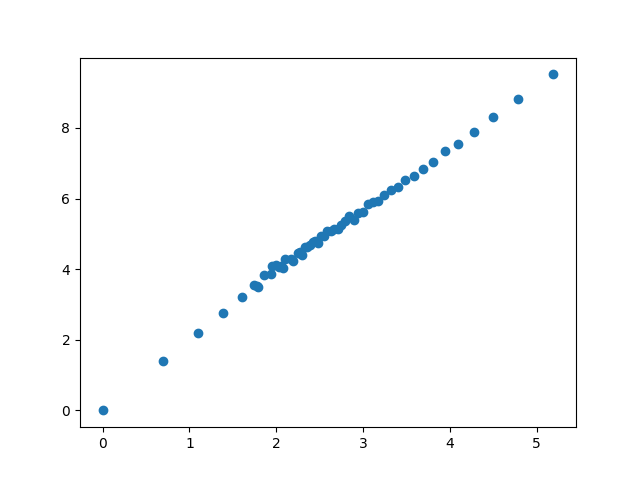

In [160]:
fig,ax = plt.subplots()
ax.scatter(np.log(tam_lado),np.log(num_caixas))
plt.show()

In [124]:
def ajuste_linear(x, y):
    # Calcula o coeficiente 'a' usando regressão linear simples
    a = sum(xi * yi for xi, yi in zip(x, y)) / sum(xi ** 2 for xi in x)
    
    # Aplica o ajuste aos dados de entrada
    x_ajustado = [a * xi for xi in x]
    
    # Retorna os dados de entrada ajustados e o coeficiente 'a'
    return x_ajustado, a

# Dados de entrada e saída

# Realiza o ajuste linear
x_ajustado, coeficiente_a = ajuste_linear([np.log(p) for p in tam_lado], [np.log(p) for p in num_caixas])
coeficiente_a

0.49896577650109475

In [161]:
np.log(num_caixas)[-1]/np.log(tam_lado)[-1]

1.832890089293815

In [162]:
plt.close()